In [24]:
import tensorflow as tf

import cv2
import imghdr
import os

import numpy as np
from matplotlib import pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [17]:
data_dir = "data"
image_exts = ["jpeg","jpg","bmp","png"]

In [10]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print(f"Image not in ext list {image_path}")
        os.remove(image_path)
    except Exception as e:
      print(f"issue with image {image_path}")
      os.remove(image_path)

In [18]:
target_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data')
data = tf.keras.utils.image_dataset_from_directory(target_dir)

Found 1042 files belonging to 2 classes.


In [19]:
# scale data
data = data.map(lambda x,y:(x/255.0,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


In [20]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


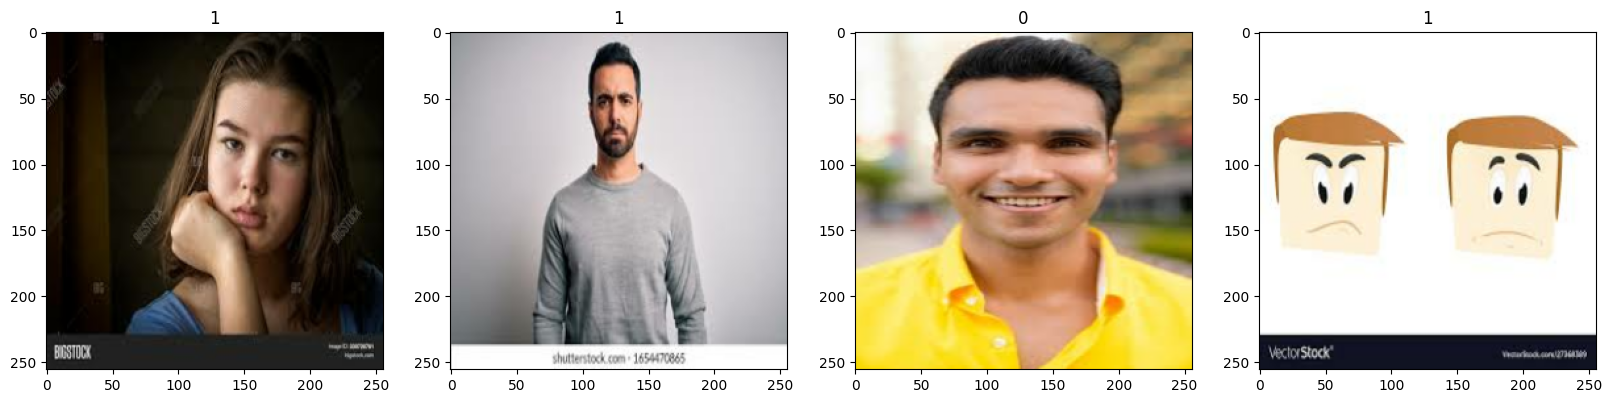

In [21]:
# scale data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])


In [27]:
# Partition Data
data_len = len(data)
train_size = int(len(data)*.7)
eval_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

train_data = data.take(train_size)
eval_data = data.skip(train_size).take(eval_size)
test_data = data.skip(train_size+eval_size).take(test_size)

In [28]:

# Create Model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [32]:
# Logging
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Training
hist = model.fit(train_data,epochs=20,validation_data=eval_data,callbacks=[tensorboard_callback])

Epoch 1/20


23/23 [==============================] - 19s 669ms/step - loss: 0.8886 - accuracy: 0.5014 - val_loss: 0.6850 - val_accuracy: 0.5223
Epoch 2/20
23/23 [==============================] - 11s 470ms/step - loss: 0.6760 - accuracy: 0.5448 - val_loss: 0.6783 - val_accuracy: 0.5402
Epoch 3/20
23/23 [==============================] - 11s 477ms/step - loss: 0.6198 - accuracy: 0.6712 - val_loss: 0.6040 - val_accuracy: 0.6830
Epoch 4/20
23/23 [==============================] - 11s 482ms/step - loss: 0.5426 - accuracy: 0.7269 - val_loss: 0.5680 - val_accuracy: 0.6964
Epoch 5/20
23/23 [==============================] - 11s 445ms/step - loss: 0.5072 - accuracy: 0.7527 - val_loss: 0.5139 - val_accuracy: 0.7321
Epoch 6/20
23/23 [==============================] - 10s 421ms/step - loss: 0.4483 - accuracy: 0.8071 - val_loss: 0.4200 - val_accuracy: 0.7812
Epoch 7/20
23/23 [==============================] - 10s 419ms/step - loss: 0.3236 - accuracy: 0.8804 - val_loss: 0.3894 - val_accuracy: 0.83

# Plot Performace

<function matplotlib.pyplot.show(close=None, block=None)>

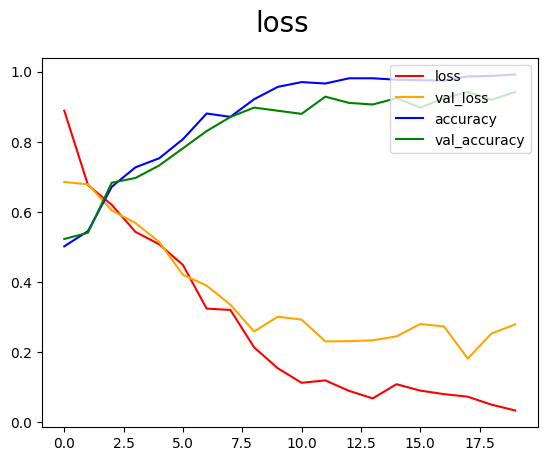

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='green',label='val_accuracy')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper right')
plt.show